# Computational Methods for Finance
# Individual Assessment 
## Meta Platforms Inc.

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as si

In [7]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [8]:
initial_data = yf.download("FB", start="2020-10-01", end="2021-10-01")

[*********************100%***********************]  1 of 1 completed


In [9]:
df = initial_data

In [10]:
S = df['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 339.39


In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-24,343.239990,354.350006,342.369995,352.959991,352.959991,18801900
2021-09-27,349.809998,355.149994,347.079987,353.579987,353.579987,15205800
2021-09-28,347.970001,349.600006,338.920013,340.649994,340.649994,21710300
2021-09-29,343.149994,345.230011,338.880005,339.609985,339.609985,14452200
2021-09-30,340.450012,342.799988,338.149994,339.390015,339.390015,16547100


In [12]:
df.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,253.00,253.00,253.00,253.00,253.00,253.00
mean,306.21,309.88,302.62,306.30,306.30,17714890.12
std,38.79,38.65,38.96,39.08,39.08,7119732.05
min,247.90,253.86,244.61,245.64,245.64,6702000.00
25%,271.89,275.96,267.87,271.97,271.97,13007700.00
50%,298.40,301.98,296.04,296.52,296.52,16172600.00
75%,342.46,345.23,339.68,341.37,341.37,20838700.00
max,381.68,384.33,378.81,382.18,382.18,56526800.00


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

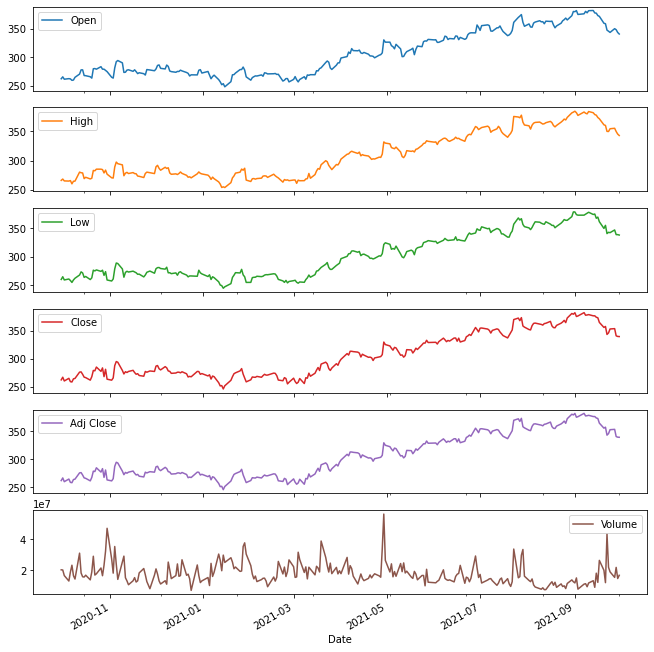

In [13]:
df.plot(figsize=(11, 12), subplots=True)

In [14]:
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.018060370739060253,
 -0.025090958702665877,
 0.01811953301085244,
 -0.022633630729339577,
 -0.0020877156780191443]

In [15]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.017899219649980952,
 -0.02541110331325694,
 0.017957330695767947,
 -0.022893703096299418,
 -0.0020898979942948763]

In [16]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is 0.30797967 and its annualized volatility is 0.31326414


In [17]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f' % (lr,lv))

The annualized log return is 0.25918720 and its annualized volatility is 0.31219563


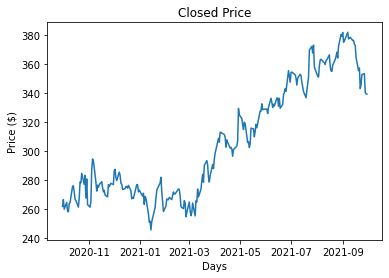

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

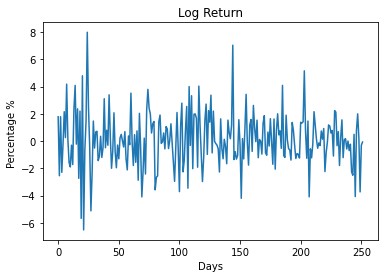

In [19]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

### BINOMIAL TREE 

In [20]:
S0 = 339.39                 # spot stock price
K = 300                     # strike
T = 0.5                       # maturity 6/12
r = 0.0121                  # risk free rate 
sigma = 0.33                # diffusion coefficient or volatility
N = 5                       # number of periods or number of time steps  
payoff = "put"              # payoff 


In [21]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [22]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [23]:
S

array([[339.39      , 376.72107194, 418.15836072, 464.15352807,
        515.20791609, 571.87801179],
       [  0.        , 305.75824046, 339.39      , 376.72107194,
        418.15836072, 464.15352807],
       [  0.        ,   0.        , 275.45921096, 305.75824046,
        339.39      , 376.72107194],
       [  0.        ,   0.        ,   0.        , 248.16265553,
        275.45921096, 305.75824046],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        223.57104482, 248.16265553],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 201.41633307]])

In [24]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4797253615925495

In [25]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        51.83734447],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        98.58366693]])

In [26]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[12.79085085,  3.77982231,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        , 21.12934153,  7.27384805,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , 33.95413271, 13.99771236,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 52.43420002, 26.9370421 ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 76.0661747 ,
        51.83734447],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        98.58366693]])

In [27]:
print('European ' + payoff, str( V[0,0]))

European put 12.790850851612438


### MONTE CARLO SIMULATION

In [28]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [29]:
S0 = 339.39                 # spot stock price
K = 300                  # strike
T = 0.5                # maturity 
r = 0.0121                # risk free rate 
sigma = 0.33            # volatility

In [30]:
S = mcs_simulation_np(5000)

In [31]:
S = np.transpose(S)
S

array([[339.39      , 340.57738492, 340.14594307, ..., 360.89055561,
        362.55819286, 365.02234882],
       [339.39      , 337.81563661, 338.10394836, ..., 322.72366193,
        322.80048298, 323.60226542],
       [339.39      , 339.08604219, 338.44882882, ..., 212.71966457,
        212.07160906, 211.8177712 ],
       ...,
       [339.39      , 338.745496  , 338.28120237, ..., 216.35289916,
        216.18778479, 216.78274372],
       [339.39      , 338.79739167, 340.04309234, ..., 208.46789384,
        209.25330616, 208.47029304],
       [339.39      , 340.73225009, 340.81298395, ..., 306.35786189,
        305.78205816, 306.98840376]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

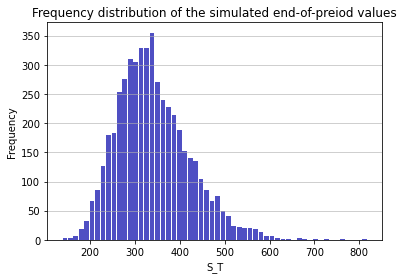

In [32]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [33]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 13.58150337050723


## Greeks

### Delta

In [34]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [35]:
print('Delta is', delta (339.39, 300, 0.5, 0.0121, 0, 0.33, 'put'))

Delta is -0.2510177801000266


In [36]:
S = np.linspace(300, 400, 51)
T = np.linspace(0.1, 1, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 300, T[i], 0.0121, 0, 0.33, 'put')

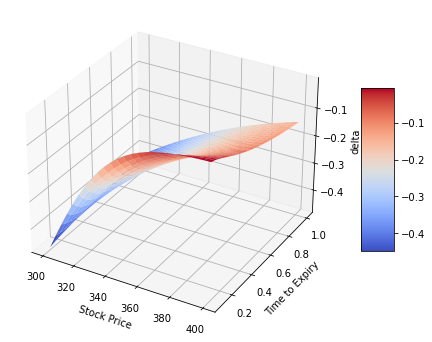

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [42]:
S = np.linspace(300,400,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
     delta_Call [i] = delta(S[i], 300, 0.5, 0.0121, 0, 0.33, 'call')
     delta_Put [i] = delta(S[i], 300, 0.5, 0.0121, 0, 0.33, 'put')

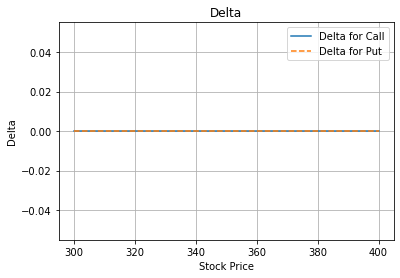

In [43]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

### Gamma

In [ ]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma


In [120]:
print('Gamma is', gamma(339.39, 300, 0.5, 0.0121, 0, 0.33, 'put'))

Gamma is 0.0040212294254450736


In [180]:
S = np.linspace(300, 400, 51)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 300, 0.5, 0.0121, 0, 0.33, 'put')

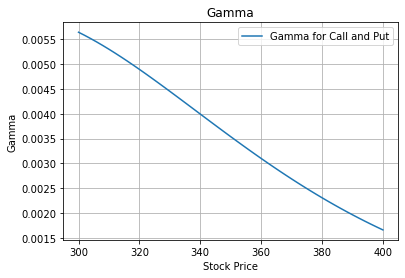

In [181]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [182]:
S = np.linspace(300, 400, 51)
T = np.linspace(0.1, 1, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 300, T[i], 0.0121, 0, 0.33, 'put')

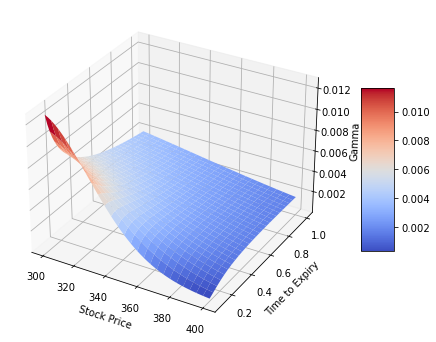

In [183]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Speed

In [68]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [122]:
print('Speed is', speed (339.39, 300, 0.5, 0.0121, 0, 0.33, 'put'))

Speed is -3.2480264288275625e-05


In [178]:
S = np.linspace(300, 400, 51)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 300, 0.5, 0.0121, 0, 0.33, 'put')

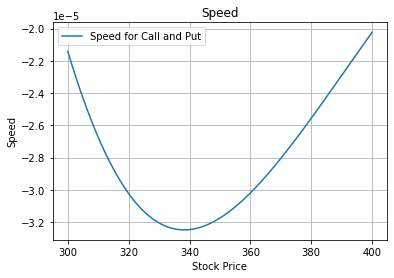

In [179]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [176]:
S = np.linspace(300, 400, 51)
T = np.linspace(0.1, 1, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed [i] = speed(S[i], 300, 0.5, 0.0121, 0, 0.33, 'put')

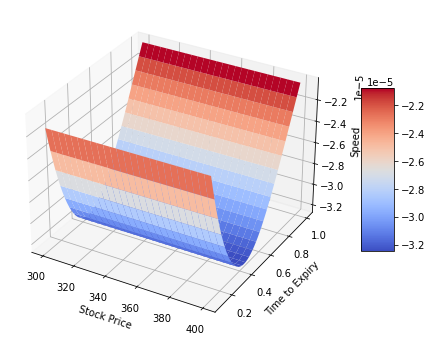

In [177]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Theta

In [71]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [123]:
print('Theta is', theta (339.39, 300, 0.5, 0.0121, 0, 0.33, 'put'))

Theta is 26.413812719424623


In [184]:
T = np.linspace(0.1, 1, 51)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(339.39, 300, T[i], 0.5, 0.0121, 0.33, 'call')
    Theta_Put [i] = theta(339.39, 300, T[i], 0.5, 0.0121, 0.33, 'put')

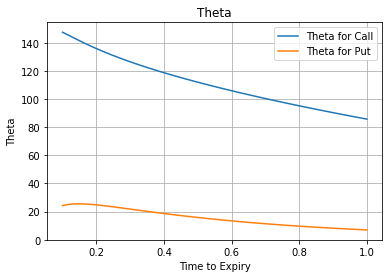

In [185]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [186]:
S = np.linspace(300, 400, 51)
T = np.linspace(0.1, 1, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(339.39, 300, T[i], 0.5, 0.0121, 0.33, 'put')

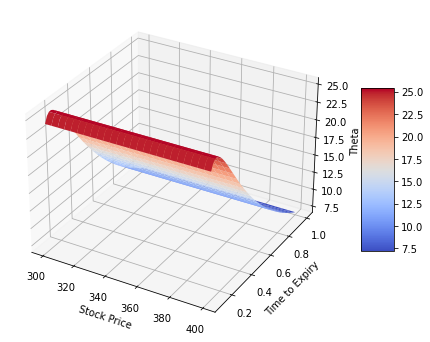

In [187]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Rho

In [76]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [190]:
print('Rho is', rho (339.39, 300, 0.5, 0.0121, 0, 0.33, 'put'))

Rho is -49.30773762973269


In [191]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(339.39, 300, 0.5, r[i], 0.0121, 0.33, 'call')
    Rho_Put [i] = rho(339.39, 300, 0.5, r[i], 0.0121, 0.33, 'put')

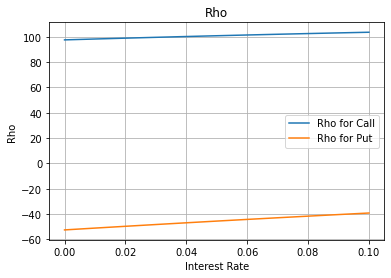

In [192]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [193]:
S = np.linspace(300, 400, 51)
T = np.linspace(0.1, 1, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 300, T[i], 0.0121, 0, 0.33, 'put')

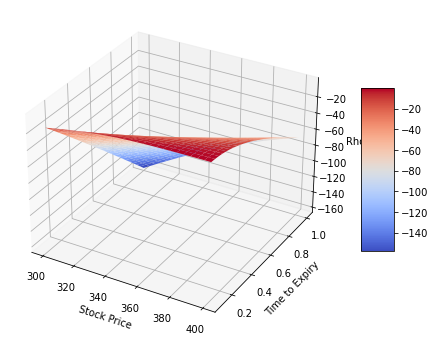

In [194]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);